In [1]:
#first let's define the function we are going to use 
import numpy as np 
import math 
import matplotlib.pyplot as plt 



def y(t, b0, b1, b2):
    b1_arg = (a*t)**(-1) * (1 - np.exp(-a*t))
    b2_arg = (a*t)**(-1) * (1 - (a*t + 1)*np.exp(-a*t))
    return b0 + b1 * b1_arg + b2 * b2_arg

def zerobond(t, b0, b1, b2):
    return np.exp(-t * y(t, b0, b1, b2))


def db_zerobond(t, b, b0, b1, b2):
    if b == "b0":
        return    -t*zerobond(t, b0, b1, b2)
    if b == "b1":
        return    -t*zerobond(t, b0, b1, b2) * (1/(a*t) * (1 - np.exp(-a*t)))
    if b == "b2":
        return    -t*zerobond(t, b0, b1, b2) * (1/(a*t) * (1 - (a*t + 1)*np.exp(-a*t)))

    
    
def get_hedged(b0, b1, b2):
    
    A = np.empty((3,3))
    for row, beta in enumerate(b):
        for col, m in enumerate(mat):
            A[row, col] = 100*db_zerobond(m, beta, b0, b1, b2)

    C = np.empty((3,1))
    for row, beta in enumerate(b):
        C[row] = - (np.sum([ 10 * db_zerobond(j/2, beta, b0, b1, b2) for j in range(1, 21)])
                   + db_zerobond(10, beta, b0, b1, b2)*100)

    solution = np.linalg.inv(A) @ C
    
    check = A @ solution - C
    return solution, check 



In [2]:
a = 1
b0 = 0.07
b1 = -0.02
b2 = 0.01
mat = [1,3,5]
b = ["b0", "b1", "b2"]

solution, check = get_hedged(b0, b1,b2)
print(f"Solution:\n{solution}\n\nCheck:\n{check}" )

def value(b0, b1, b2):
    value_p1 = np.sum([ solution[j] * 100*zerobond(m, b0, b1, b2) for j,m in enumerate(mat) ]) 
    value_p2 = np.sum([ 10 * zerobond(j/2, b0, b1, b2) for j in range(1, 11)]) + zerobond(10, b0, b1, b2)*100
    value = value_p1 + value_p2
    return value 

val_ = value(b0,b1, b2)

Solution:
[[-1.50994965]
 [ 3.9662165 ]
 [-5.62314624]]

Check:
[[ 0.00000000e+00]
 [-3.41060513e-13]
 [-8.52651283e-14]]


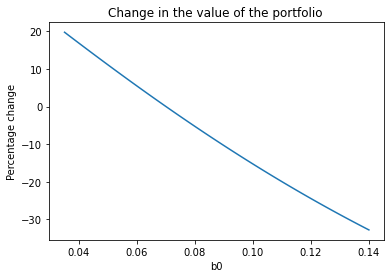

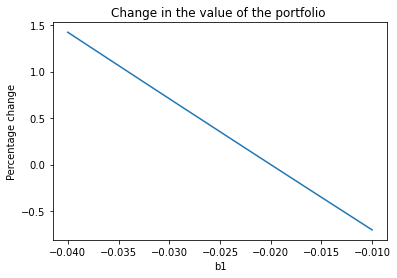

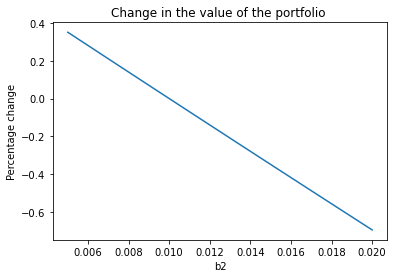

In [3]:
b_val = dict(zip(b, [b0, b1, b2]))
for b_ in b:
    values = []
    space = np.linspace( b_val[b_]*0.5, b_val[b_]*2, 100 )
    if b_ == "b0":
        for j in space:
            values.append(value(j, b1, b2))
    if b_ == "b1":
        for j in space:
            values.append(value(b0, j, b2))
    if b_ ==  "b2":
        for j in space:
            values.append(value(b0, b1, j))
            
    plt.plot(space, 100*(np.array(values)/val_- 1))
    plt.title("Change in the value of the portfolio ")
    plt.xlabel(b_)
    plt.ylabel("Percentage change")
    plt.show()